a. Understanding dataset

In [1]:
# importing pandas csv library:
import pandas as pd

In [2]:
# stroing csv in variable:
dataframe = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
# Showing number of attributes:
dataframe.shape

(1470, 35)

In [4]:
# showing the statistics of the dataset: 
dataframe.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# number of missing values in the dataset:
dataframe.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# number of duplicate values in the dataset
dataframe[dataframe.duplicated(keep=False)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


b. Data Cleaning

In [7]:
# dropping row if target is null
dataframe.dropna(subset=['Attrition'], inplace=True)

In [8]:
# replacing any null values with columnwise mean
dataframe.fillna(dataframe.select_dtypes(include=['number']).mean(), inplace=True)

In [9]:
# keeping one copy of row if duplicate row found
dataframe.drop_duplicates(inplace=True)

c. Creation of input and output features

In [10]:
# splitting data between Features and Labels
Features = dataframe.drop('Attrition', axis=1)
Labels = dataframe['Attrition']

d.  Conversion of features into numeric values

In [11]:
# List of columns to convert to categorical
categorical_columns = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'Over18',
    'OverTime'
]

# Convert non numeric columns to categorical type
for col in categorical_columns:
    Features[col] = Features[col].astype('category')

In [12]:
# showing data types of Features
Features.dtypes

Age                            int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
StockOptionLevel               int64
T

In [13]:
# One hot encoding
Features = pd.get_dummies(Features)

In [14]:
# Convert only boolean columns back to 0 and 1
boolean_columns = Features.select_dtypes(include=['bool']).columns

# Convert the selected boolean columns to integers (0 and 1)
Features[boolean_columns] = Features[boolean_columns].astype(int)
Features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,1,0,1,1,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,1,0,1,1,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,0,0,0,1,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,1,0,0,1,0,1,1,0


In [15]:
# showing features datatypes
Features.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

e. Scaling of the features

In [16]:
# scaling type
#scaling_type = "minmax"
scaling_type = "standard"

def scaling(scaling_type):
    if scaling_type == "minmax":
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        features_normalized = scaler.fit_transform(Features) #fit between 0 and 1
        return features_normalized
    elif scaling_type == "standard":
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        features_normalized = scaler.fit_transform(Features) #It transforms the data so that it has a mean of 0 and a standard deviation of 1
        return features_normalized

features_normalized = scaling(scaling_type)


f. Correlation Analysis:

In [17]:
# features and labels are put into dataframe
features_df = pd.DataFrame(features_normalized, columns=Features.columns) # scaled feature dataframe
labels_df = pd.DataFrame(Labels, columns=['Attrition'])

In [18]:
# correlation analysis of features with target
# Convert 'Yes' to 1 and 'No' to 0 in the target column
labels_df['Attrition'] = labels_df['Attrition'].map({'Yes': 1, 'No': 0})
target_series = labels_df['Attrition']
correlations = features_df.corrwith(target_series) #contribution of each column
correlations

C:\Users\xbcnu\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\xbcnu\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                   

In [19]:
top_20_correlations = correlations.abs().sort_values(ascending=False).head(20)
top_20_correlations

OverTime_Yes                        0.246118
OverTime_No                         0.246118
MaritalStatus_Single                0.175419
TotalWorkingYears                   0.171063
JobLevel                            0.169105
YearsInCurrentRole                  0.160545
MonthlyIncome                       0.159840
Age                                 0.159205
JobRole_Sales Representative        0.157234
YearsWithCurrManager                0.156199
StockOptionLevel                    0.137145
YearsAtCompany                      0.134392
JobInvolvement                      0.130016
BusinessTravel_Travel_Frequently    0.115143
JobSatisfaction                     0.103481
EnvironmentSatisfaction             0.103369
JobRole_Laboratory Technician       0.098290
MaritalStatus_Married               0.090984
JobRole_Research Director           0.088870
MaritalStatus_Divorced              0.087716
dtype: float64

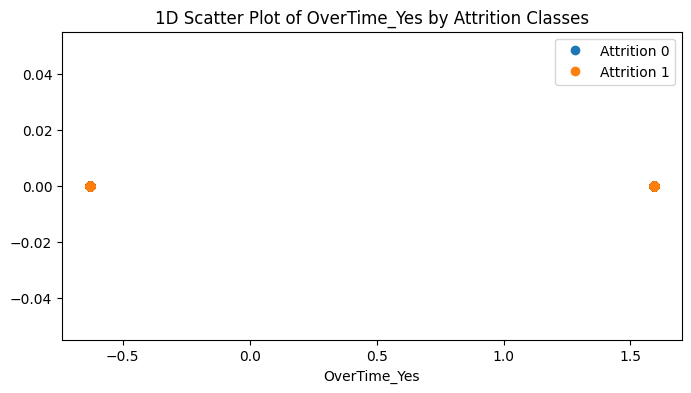

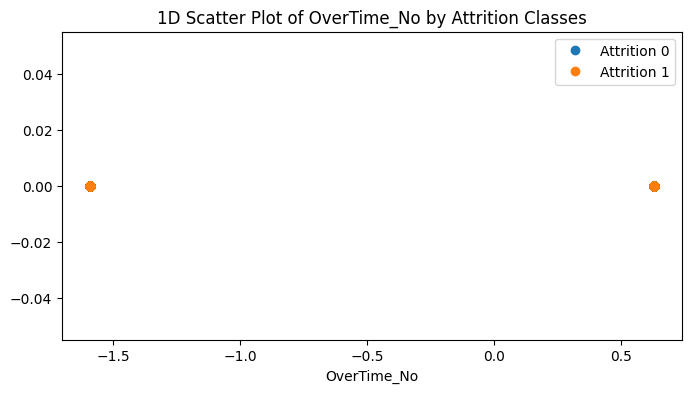

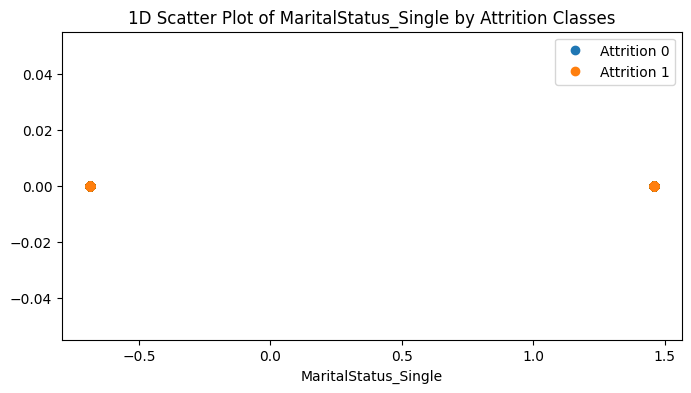

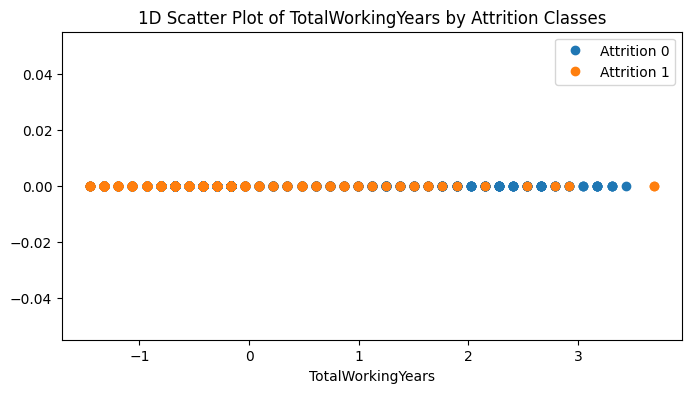

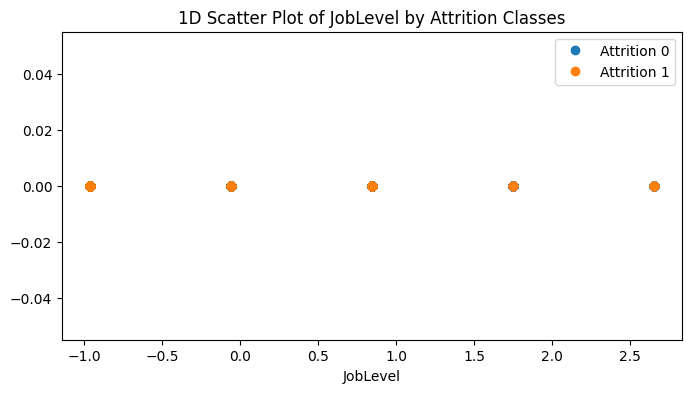

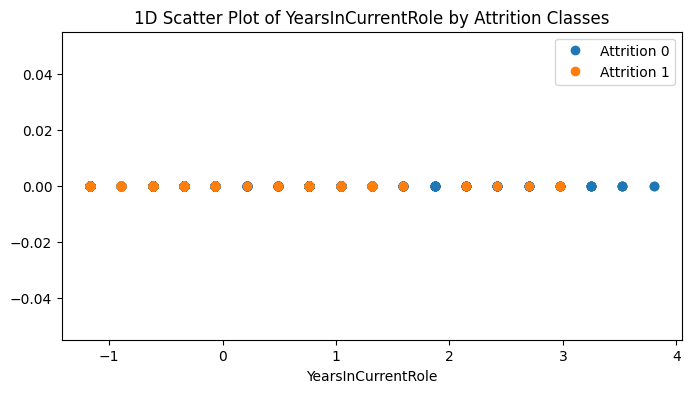

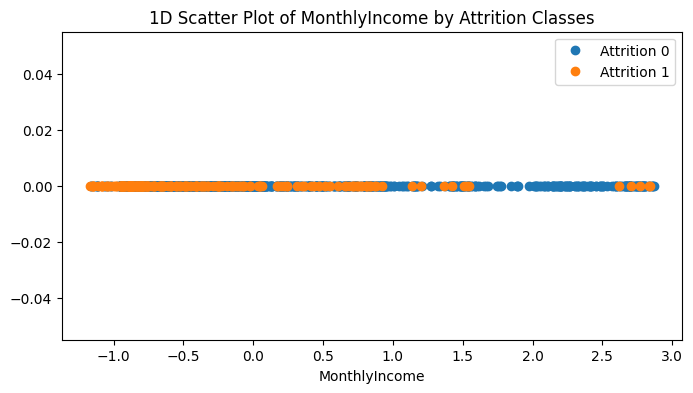

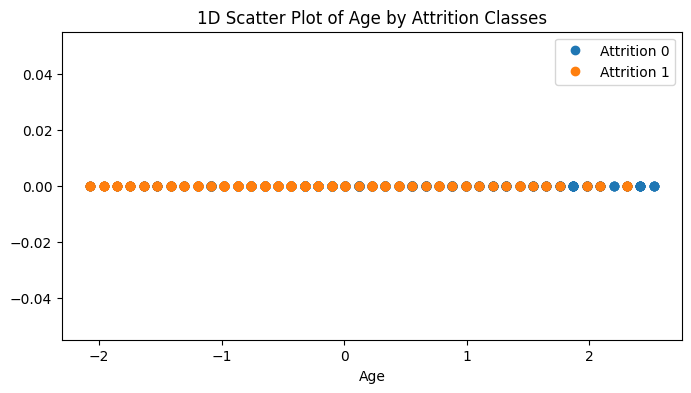

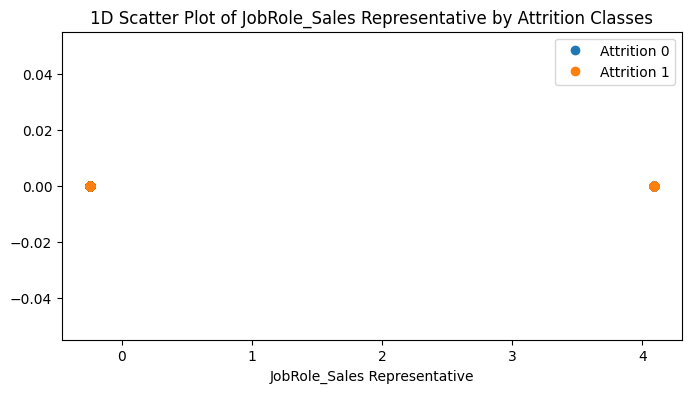

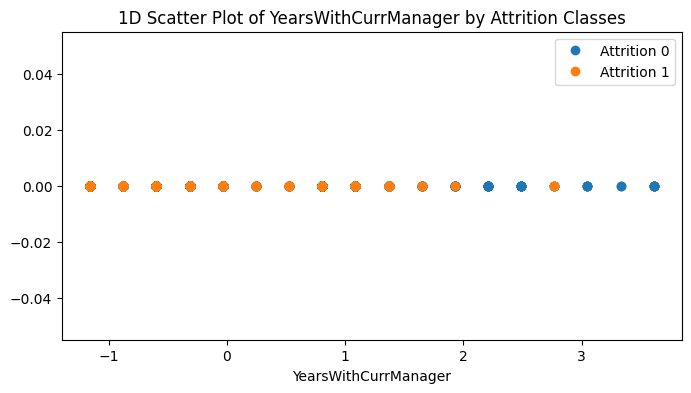

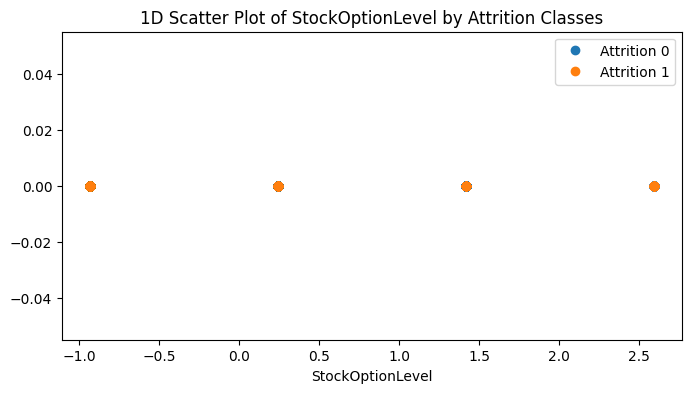

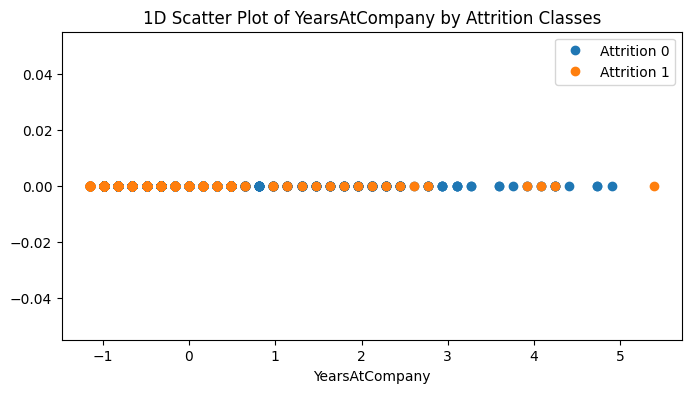

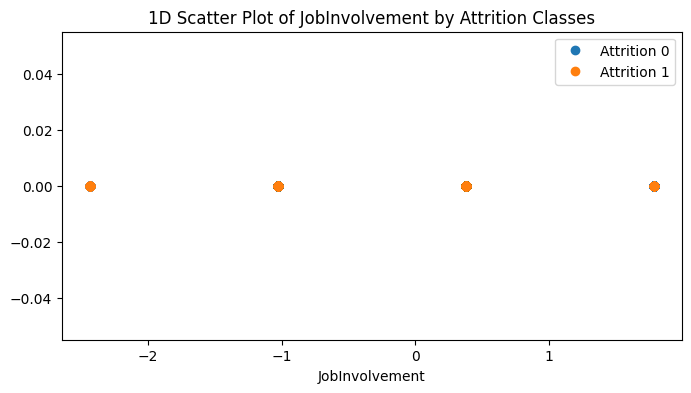

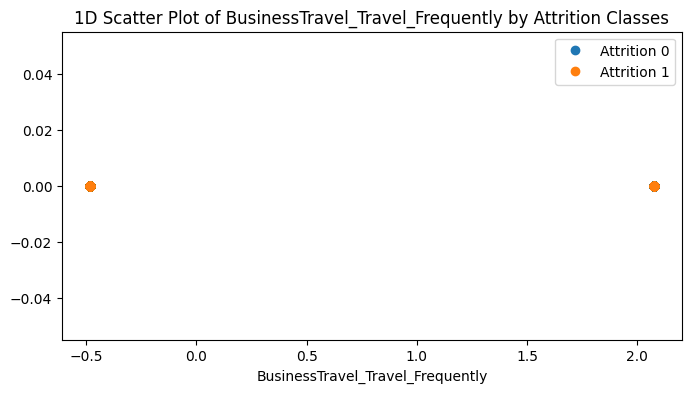

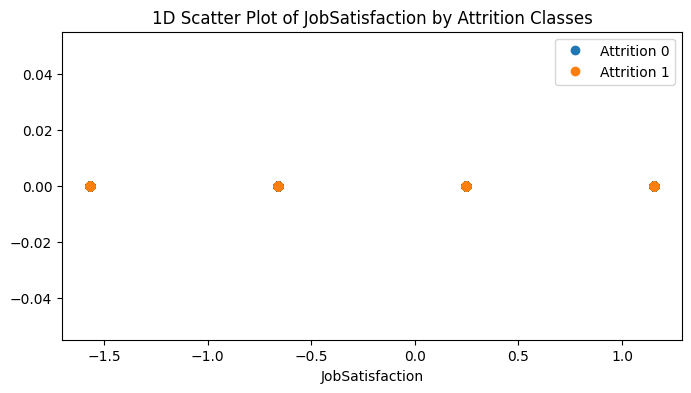

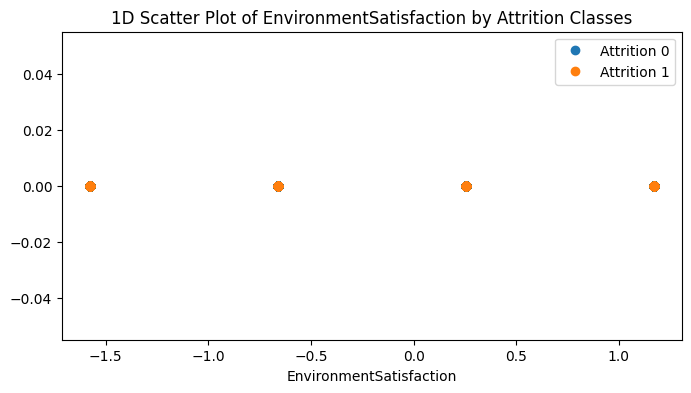

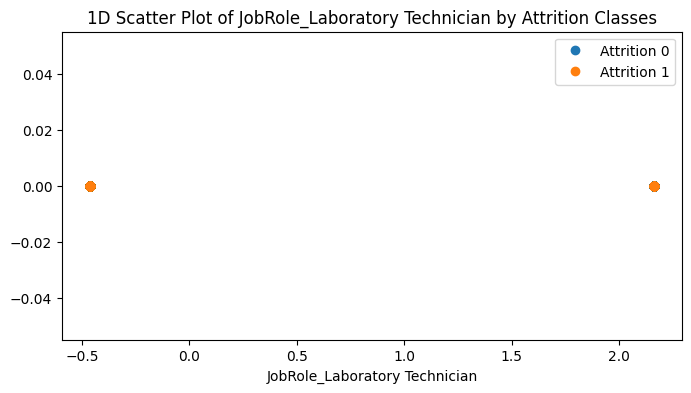

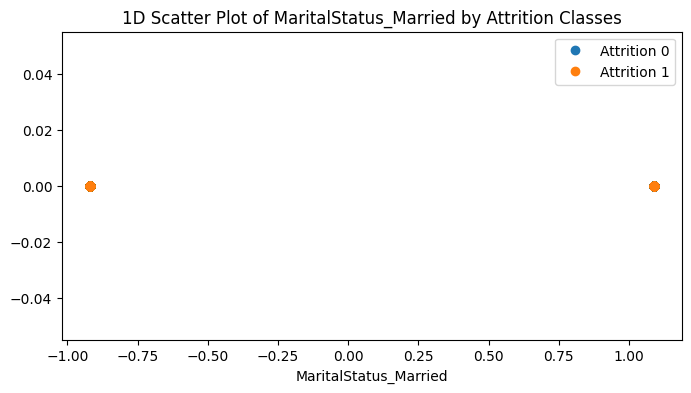

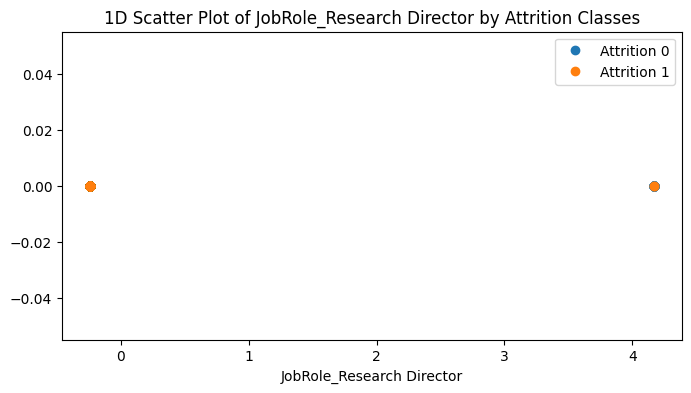

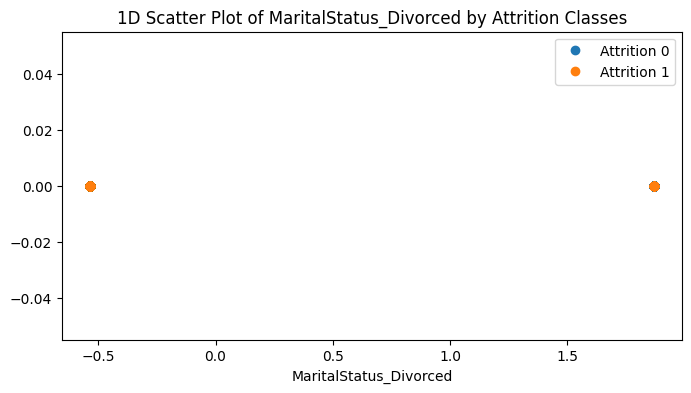

In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Assuming 'correlations' is a Pandas Series with feature correlation values
# Sort correlations and get the top 20
top_20_features = correlations.abs().sort_values(ascending=False).head(20).index

# Loop through each of the top 20 features
for feature in top_20_features:
    # Separate the data based on the Attrition class
    class_0 = features_df[labels_df["Attrition"] == 0]
    class_1 = features_df[labels_df["Attrition"] == 1]

    # Plot 1D scatter plot
    plt.figure(figsize=(8, 4))
    plt.plot(class_0[feature], np.zeros_like(class_0[feature]), 'o', label='Attrition 0')
    plt.plot(class_1[feature], np.zeros_like(class_1[feature]), 'o', label='Attrition 1')

    plt.legend()
    plt.xlabel(feature)
    plt.title(f'1D Scatter Plot of {feature} by Attrition Classes')
    plt.show()

g. Validating the pipeline:

In [21]:
#Importnecessarylibraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#AssumeXandyareyourinputmatrices
#X-->(numberofrows,numberofcolumns),alreadyscaled
#y-->binarytargetclass(0or1)
#Dummyexampledata(replacethesewithyouractualdata)
#X=np.random.rand(100,5) #Examplefeaturematrixwith100rowsand5columns
#y=np.random.randint(0,2,100) #Examplebinarytargetvector
#Step1:Split thedataintotrainingandtestingsets
X_train,X_test,y_train,y_test=train_test_split(features_df,labels_df, test_size=0.2,random_state=42)
#Step2: InitializetheLogisticRegressionclassifier
clf=LogisticRegression()
#Step3:Traintheclassifieronthetrainingdata
clf.fit(X_train,y_train)
#Step4:Makepredictionsonthetestset
y_pred=clf.predict(X_test)
#Step5:Evaluatetheclassifier'sperformance
accuracy=accuracy_score(y_test,y_pred)
print(f"AccuracyofLogisticRegressionclassifier:{accuracy:.2f}")


AccuracyofLogisticRegressionclassifier:0.88


C:\Users\xbcnu\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
